In [1]:
## Filtering spam SMS using Naive Bayes

rm(list=ls())
## Window 환경에서 UTF-8로 인코딩된 csv파일을 read.csv로 읽는 경우 
## EOF within quoted string 이라는 Warning이 발생하기도한다
## 이 문제를 해결하기 위해 아래 코드를 실행하여 시스템 기본 locale을 바꿔주면 해결된다!
Sys.setlocale(category="LC_CTYPE", locale="C")

[1] "C"

In [3]:
sms_raw <-read.csv("sms_spam.csv",stringsAsFactors = FALSE)
# StringAsFactors 글자 변환할 때 유의해서 할 것
str(sms_raw)

'data.frame':	5574 obs. of  2 variables:
 $ type: chr  "ham" "ham" "spam" "ham" ...
 $ text: chr  "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..." "Ok lar... Joking wif u oni..." "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question("| __truncated__ "U dun say so early hor... U c already then say..." ...


In [4]:
## 5574개의 메시지와 두 속성(햄/스팸)으로 구성
## type변수가 chr 형으로 저장되어 있는데, factor 변수로 변경해야 한다.
## 분류할 속성은 factor
## 13.4%가 스팸메시지이다!!
sms_raw$type<-factor(sms_raw$type)
table(sms_raw$type)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


 ham spam 
4827  747 

In [5]:
## 메시지는 문자열로 구성되어있다. 
## 여러 접속사 등이 포함되어 처리를 해야되고, 문장을 개별 단어로도 분리해야한다 
## tm 패키지를 불러와 함수를 사용하자!
## install.packages("tm")
library(tm)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsLoading required package: NLP


In [6]:
## step1.Corpus(말뭉치)를 만들자
## corpus란 텍스트 문서의 모음을 말함 
## VCorpus()는 corpus를 만들어서 메모리상에 저장한다
## PCorpus()는 corpus를 직접 디스크에 저장한다
## 말뭉치가 5574개의 메시지에 대한 문서를 포함하고있다. 
sms_corpus <- VCorpus(VectorSource(sms_raw$text))
# VectorSource는 각 벡터 요소를 document요소로 변경시켜준다.
print(sms_corpus)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5574


In [11]:
## 말뭉치 내부의 메시지 내용을 보기위해서는 as.character()를 이용해야한다
as.character(sms_corpus[[1]])

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."

In [12]:
## step2. Corpus내부의 텍스트를 정제하자 
## tm_map()를 이용해 말뭉치를 mapping한다 
## 우선 tolower()를 이용해 모든 문자를 소문자로 변환하고
## mapping한 결과물을 corpus_clean에 저장하자!!
sms_corpus_clean<-tm_map(sms_corpus, content_transformer(tolower))
as.character(sms_corpus_clean[[1]])

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat..."

In [13]:
## removeNumbers()를 이용해서 숫자도 제거하도록하자
sms_corpus_clean<-tm_map(sms_corpus_clean, removeNumbers)

## to, and, but, or 같은 단어를 제거하자(stop word)
## 자주 등장하지만 의미있는 정보를 제공하지 않기 때문에 미련없이 제거ㅎㅎ
## head를 쓰면 stopword로 분류되는 단어들이 뭐가 있는지 볼 수 있다
## stopword가 174개 존재하는군 
head(stopwords(), 20)
length(stopwords())
class(stopwords())
sms_corpus_clean<-tm_map(sms_corpus_clean, removeWords, stopwords())

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "i"          "me"         "my"         "myself"     "we"        
 [6] "our"        "ours"       "ourselves"  "you"        "your"      
[11] "yours"      "yourself"   "yourselves" "he"         "him"       
[16] "his"        "himself"    "she"        "her"        "hers"

[1] 174

[1] "character"

In [14]:
## 구두점도 제거하자(구두점 다들 뭔지 아시죠? ㅎㅎ)
sms_corpus_clean<-tm_map(sms_corpus_clean, removePunctuation)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [15]:
## step3. 어간 추출(stemming)
## learning, learns, learned 가 있을 때 모두 learn 이된다 
## Snowball 패키지의 wordStem()을 사용하자
## install.packages("SnowballC")
library(SnowballC)
sms_corpus_clean<-tm_map(sms_corpus_clean, stemDocument)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [16]:
## 의미없는 한 줄띄기도 제거해주자
sms_corpus_clean<-tm_map(sms_corpus_clean, stripWhitespace)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [17]:
## step4. 토큰화(tokenization)
## tm 패키지의 DocumentTermMatrix()를 이용해 말뭉치를 입력받는다.
## 위의 output은 sparse matrix로 나온다.
## 행은 메시지, 열은 단어임!!
sms_dtm <- DocumentTermMatrix(sms_corpus_clean)
#DocumentTermMatrix 를 이용해서 변형한다.
dim(sms_dtm)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 5574 6564

In [18]:
## sms_dtm의 내용을 확인하고 싶다면 
## View(as.matrix(sms_dtm)) 
## 를 하시면 되는데요 6597개 열 나오니까 비추천할게요

####################################################################
############ 와 드디어 텍스트 전처리가 끝났어요~!!! ################

## 이제 train/test data를 나눌거에요 
sms_dtm_train<-sms_dtm[1:4169, ]
sms_dtm_test<-sms_dtm[4170:5572, ]

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [19]:
## 각 메시지가 스팸인지 햄인지 나타내는지 따로 벡터에 저장할게요 
## 저장한 문자열 벡터에 스팸의 비율이 적당한지 prop.table로 확인할게요
## 오 그냥 짤랐는데 스팸 비율이 환상적이에요!! OMG!!
sms_train_labels<-sms_raw[1:4169,]$type
sms_test_labels<-sms_raw[4170:5572,]$type
prop.table(table(sms_train_labels))
prop.table(table(sms_test_labels))

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

sms_train_labels
      ham      spam 
0.8647158 0.1352842 

sms_test_labels
      ham      spam 
0.8695652 0.1304348 

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsLoading required package: RColorBrewer


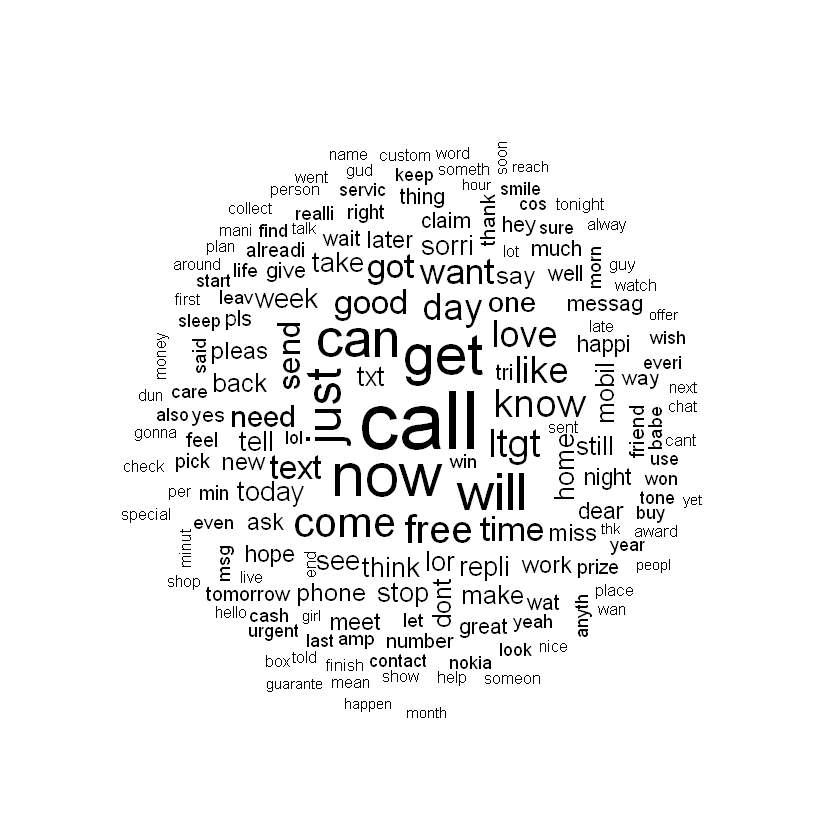

In [20]:
## step5. 워드클라우드(Word Cloud)
## 텍스트 데이터에서 단어의 빈도를 시작적으로 묘사하는 방법이에요
## install.packages("wordcloud")
## random.order = FALSE는 자주 나오는 단어일 수록 가운데 위치하게 해줍니다 
## min.freq는 클라우드에 등장하기 위한 최소빈도수를 나타내는데
## 말뭉치의 약 10%로 설정하는게 보통이에요 
library(wordcloud)
wordcloud(sms_corpus_clean, min.freq = 50, random.order = FALSE)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

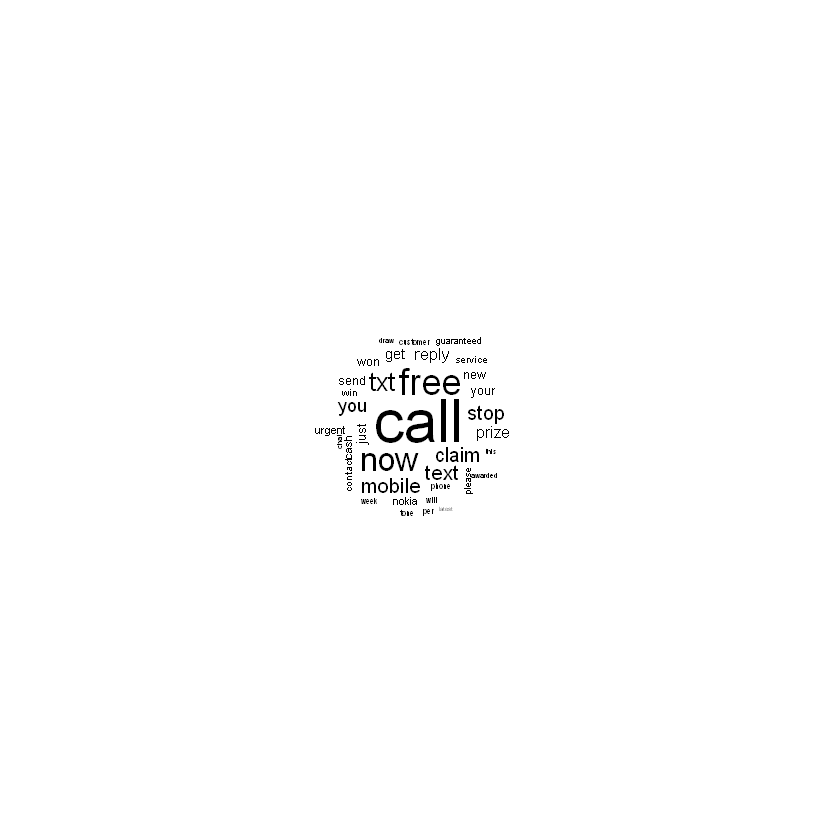

In [ ]:
## subset()함수를 이용해서 sms_raw 데이터에서 스팸과 햄을 나눌게요
## 나눈 데이터에 대해 각각 워드클라우드 만들게요
## spam은 call, now, free, mobile, stop과 같은 단어 등장
## ham은 can, get, like, good, got, come, know와 같은 단어 등장
## 이러한 차이는 NBC 모델이 카테고리를 구별할 수 있는 키워드가 됩니다 

spam <-subset(sms_raw, type=="spam")
wordcloud(spam$text, min.freq = 30, scale=c(3,0,5), random.order = FALSE)

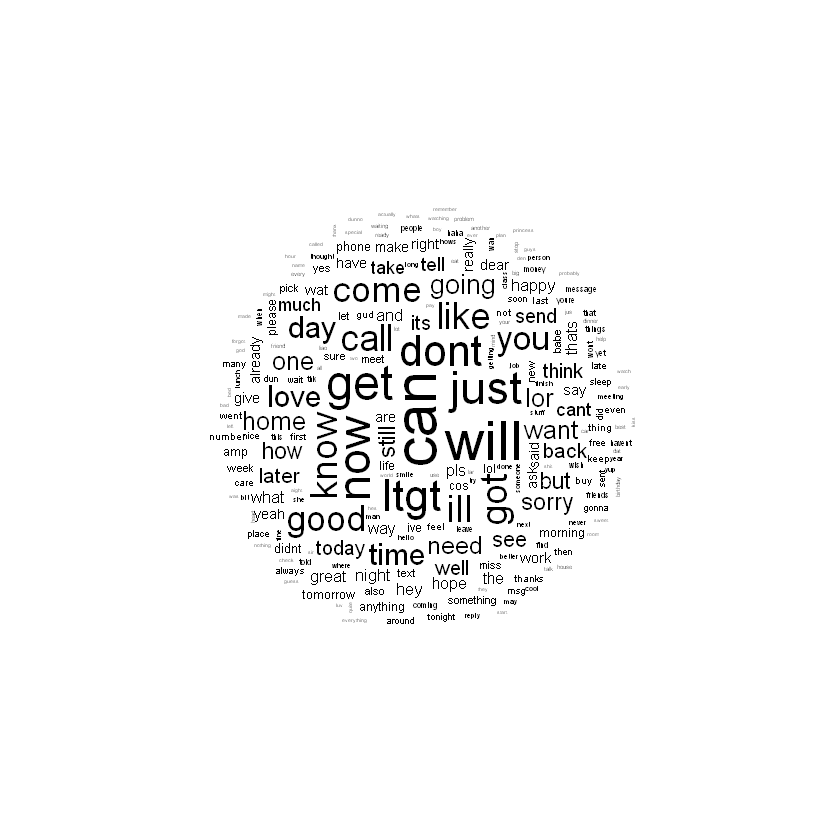

In [32]:
ham <-subset(sms_raw, type=="ham")
wordcloud(ham$text, min.freq = 30, scale=c(3,0,5), random.order = FALSE)

In [21]:
## step6. sparse matrix 구조 변환하기
## 위에서 만든 sparse matrix를 nbc가 훈련하는데 용이하도록 바꿔줄거에요
## sms_dtm이 6597열을 갖고 있다고 했잖아요?
## 좀 줄이기 위해서 빈도가 5 미만이면 삭제할게요 
## 5번 이상 나타난 단어들의 문자 벡터를 sms_freq_words에 저장합니다 
## str을 해보니 1158개 단어가 있음을 알 수 있군요!!
sms_freq_words<-findFreqTerms(sms_dtm_train, 5)
#findFreqTerms(대상, 최소횟수, 최대횟수)
# 해당 요소들을 배열로 빼주니까 열 캐치하는 곳에 바로 사용가능하네.
str(sms_freq_words)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

 chr [1:1153] "abiola" "abl" "abt" "accept" "access" "account" "across" ...


In [22]:
## 위에서 만든 train/test에서 sms_freq_words에 있는 칼럼만 추출할게요
## 그럼 이제 train/test data는 1158 개 단어만 갖고 있는거에요 
sms_dtm_freq_train<-sms_dtm_train[,sms_freq_words]
sms_dtm_freq_test<-sms_dtm_test[,sms_freq_words]

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [23]:
## NBC는 단어의 빈도는 고려하지 않고 등장여부가 중요해요
## 그런데 sparse matrix는 apple단어가 2번 등장하면 2가 저장되어있습니다.
## 이렇게되면 nbc는 훈련을 할 수가 없어요.
## 그래서 빈도가 0이면 NO, 1이상이면 Yes를 출력하는 함수를 만들게요
convert_counts<-function(x){
  x<-ifelse(x>0, "Yes","No")
}

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [25]:
## 위 함수를 일괄 적용하기 위해서 apply함수를 쓸게요
## 옵션에 MARGIN=2는 conver_counts 함수를 각 열에 대해서 적용한다는 뜻!
sms_train<-apply(sms_dtm_freq_train, MARGIN=2, convert_counts)
sms_test<-apply(sms_dtm_freq_test, MARGIN=2, convert_counts)
summary(sms_train[,1:5])
####################################################################
############ 와 드디어 train/test 나누기가 끝났어요! ###############

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

 abiola      abl        abt       accept     access    
 No :4158   No :4151   No :4149   No :4163   No :4163  
 Yes:  11   Yes:  18   Yes:  20   Yes:   6   Yes:   6  

In [26]:
## 전처리한 데이터를 갖고 NB모델을 훈련시킬겁니다
## naiveBayes(train, class, laplace=0) 인데
## train은 훈련 데이터이고 class는 훈련 데이터의 라벨 벡터에요
## laplace는 라플라스 스무딩 사용여부에요 휴 길다길어
library(naivebayes)
sms_classifier<-naive_bayes(sms_train, sms_train_labels, laplace = 1)
head(sms_classifier$table)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

$abiola
      
abiola         ham        spam
   No  0.996673136 0.998233216
   Yes 0.003326864 0.001766784

$abl
     
abl           ham        spam
  No  0.994732465 0.998233216
  Yes 0.005267535 0.001766784

$abt
     
abt           ham        spam
  No  0.994177987 0.998233216
  Yes 0.005822013 0.001766784

$accept
      
accept         ham        spam
   No  0.998059329 0.998233216
   Yes 0.001940671 0.001766784

$access
      
access          ham         spam
   No  0.9991682839 0.9911660777
   Yes 0.0008317161 0.0088339223

$account
       
account         ham        spam
    No  0.995564181 0.978798587
    Yes 0.004435819 0.021201413


In [27]:
## NB모델의 성능을 평가해볼겁니다. 
## 데스트 데이터에 대한 예측 결과를 sms_test_pred에 저장할거에요
## 정확도도 봐야죠? 무려 97.48%!!
sms_test_pred<-predict(sms_classifier, sms_test)
library(caret)
confusionMatrix(sms_test_pred, sms_test_labels)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsLoading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:NLP':

    annotate



Confusion Matrix and Statistics

          Reference
Prediction  ham spam
      ham  1213   28
      spam    7  155
                                          
               Accuracy : 0.9751          
                 95% CI : (0.9655, 0.9826)
    No Information Rate : 0.8696          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8844          
 Mcnemar's Test P-Value : 0.0007232       
                                          
            Sensitivity : 0.9943          
            Specificity : 0.8470          
         Pos Pred Value : 0.9774          
         Neg Pred Value : 0.9568          
             Prevalence : 0.8696          
         Detection Rate : 0.8646          
   Detection Prevalence : 0.8845          
      Balanced Accuracy : 0.9206          
                                          
       'Positive' Class : ham             
                                          